# Das Standardbeispiel für neuronale Netzwerke
## Erkennen von handgeschriebenen Ziffern
MNIST ist eine Datenbank, in der zehntausende handgeschriebene Zahlen eingescannt und bezeichnet sind. Diese Daten eignen sich zum Trainieren und Testen von neuronalen Netzwerken

[Link zum Wiki](https://de.wikipedia.org/wiki/MNIST-Datenbank)<br>
[Link zur Datenbank](https://yann.lecun.com/exdb/mnist/)

In [43]:
import  mnist_loader
from matplotlib import pyplot as plt
import network
import numpy as np

In [44]:
training_data,validation_data,test_data = mnist_loader.load_data_wrapper()

In [45]:
training_data=list(training_data)
validation_data=list(validation_data)
test_data=list(test_data)

In [46]:
print(len(training_data))
print(len(validation_data))
print(len(test_data))

50000
10000
10000


Aus der Dokumentation der MNIST-Datenbank kann man erfahren, dass die Ziffern als 28x28 Graustufenbilder gespeichert sind.

**Erste Aufgabe:** Mache Beispiele der Trainingsdaten und deren Label sichtbar. Gib zum Beispiel 10 zufällige Datenbeispiele aus. (Warnung: Das resizing zerstört die Daten. Zum Netzwerktraining Daten neu laden.)

In [59]:
i=48
#print(training_data[i])
#print(training_data[i][1])
training_data[i][0].resize(28,28)
print(training_data[i][0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

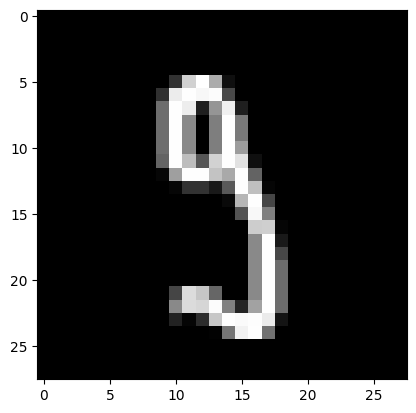

label:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [60]:
plt.imshow(training_data[i][0], cmap='gray', vmin=0, vmax=1)
plt.show()
print("label:\n",training_data[i][1])

In [34]:
img = training_data[i][0]
for x in range(28):
    for y in range(28):
        if img[x][y]<0.01:
            print("  ",end="")
        elif img[x][y]<0.2:
            print("..",end="")
        elif img[x][y]<0.5:
            print("oo",end="")
        elif img[x][y]<0.7:
            print("xx",end="")
        elif img[x][y]<0.9:
            print("AO",end="")
        else:
            print( "XX",end="")
    print()

                                                        
                                                        
                              xxXXAO..                  
                          ..xxXXAOxx..                  
                          ooXXxx                        
                        ooXXAO..                        
                        xxXXoo                          
                      ooXXxx                            
                      ooXXxx                            
                      AOAO..                            
                    ..XXxx                              
                    xxXXoo                              
                    AOXX..                              
                  ..AOAO..            ..                
                  ooXXoo        ..xxxxXXXXxx            
                  ooXXoo      ooAOXXxxxxXXAO            
                  ooXXoo    ooXXAOoo  ..XXoo            
                  ooXXoo  ..XXx

**Zweite Aufgabe:** Schreibe eine kleine Funktion, die statt des Arrays, die entsprechende Ziffer zurückgibt.

In [35]:
def label(array):
    for i in range(10):
        if array[i]==1:
            return i

In [37]:
training_data[i][1]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

## Erstellung eines Netzwerks, Training und Test
Ihr werdet gleich im Video sehen, was ein neuronales Netzwerk ist. Für den Moment ist es eine Black-Box, die 28x28=784 Grauwerte einliest und eine Zahl zwischen 0 und 9 wieder ausspuckt. Dafür benötigt das Netzwerk 784 Eingänge und 10 Ausgänge. Zusätzlich fügen wir noch 30 interne Gehirnzellen hinzu, die das Netzwerk komplexer und leistungsfähiger machen.

In [54]:
net = network.Network([784,30,30,10])
net.SGD(training_data, epochs = 10,mini_batch_size= 10,eta = 3.0, test_data=test_data)

Epoch 0 : 9089 / 10000
Epoch 1 : 9215 / 10000
Epoch 2 : 9344 / 10000
Epoch 3 : 9282 / 10000
Epoch 4 : 9407 / 10000
Epoch 5 : 9409 / 10000
Epoch 6 : 9387 / 10000
Epoch 7 : 9473 / 10000
Epoch 8 : 9397 / 10000
Epoch 9 : 9433 / 10000


Wir testen einfach mal, wie gut das Netzwerk unsere Zahlen erkennen kann.

In [55]:
net.evaluate(validation_data)

9486

In [56]:
# Finde Falschklassifizierungen
for i in range(0,400):
    ergebnis = np.argmax(net.feedforward(training_data[i][0]))
    lbl  = label(training_data[i][1])
    if ergebnis!=lbl:
        print(i,ergebnis,lbl)

48 5 9
80 8 9
132 1 5
134 4 1
212 9 7
224 3 1
244 8 5
268 7 2
278 2 5
354 9 4
370 3 7


In [58]:
net.feedforward(training_data[48][0])

array([[3.52747985e-04],
       [2.78940561e-03],
       [2.22376354e-04],
       [7.05231072e-03],
       [3.11006599e-05],
       [6.79534472e-01],
       [2.36015628e-05],
       [1.14057796e-05],
       [3.86136637e-02],
       [7.72434153e-03]])